In [1]:
import numpy as np
import matplotlib.pyplot as plt

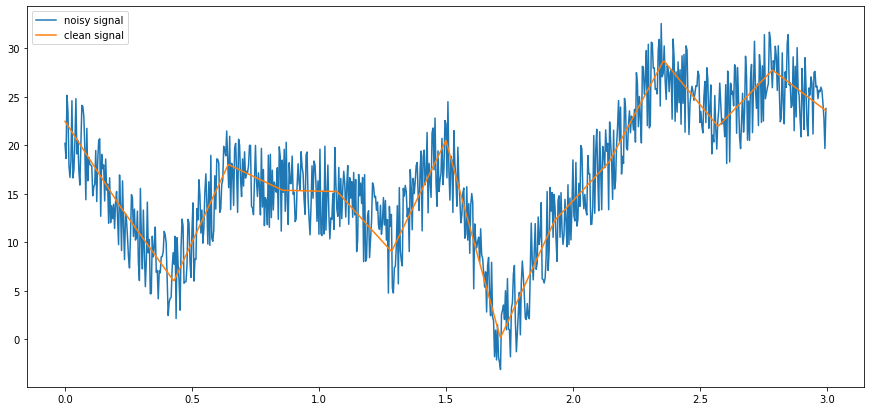

In [30]:
# Creating signal

sampling_rate = 256
time = np.arange(0, 3, 1 / sampling_rate)  # 256 * 3 seconds
n_interpolation_pole = 15  # real number of data points before interpolation
n_data = len(time)  # number of data points after interpolation
data_amplitude = 30
noise_amplitude = 5

clean_signal = np.random.random(n_interpolation_pole) * data_amplitude
clean_signal = np.interp(time, np.linspace(0, 3, n_interpolation_pole), clean_signal)
noise = np.random.uniform(-1, 1, n_data) * noise_amplitude
noisy_signal = clean_signal + noise

plt.figure(figsize=(15, 7))
plt.plot(time, noisy_signal, label='noisy signal')
plt.plot(time, clean_signal, label='clean signal')
plt.legend()


Text(0.5, 1.0, 'Gaussian kernel with full_width_half_maximum = 40')

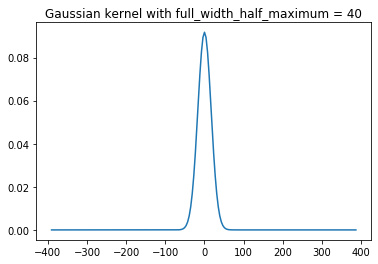

In [32]:
# Creating Gaussian window in TIME-DOMAIN

full_width_half_maximum = 40  # ms, influences width of the 'bell' shape

k = 100  # k should be large enough for the Gaussian curve to touch the x axis on sides
gaussian_time = 1000 * np.arange(-k, k) / sampling_rate
gaussian_window = np.exp(-(4 * np.log(2) * (gaussian_time ** 2)) / full_width_half_maximum ** 2)
gaussian_window /= sum(gaussian_window)

plt.plot(gaussian_time, gaussian_window)
plt.title('Gaussian kernel with full_width_half_maximum = %d' % full_width_half_maximum)


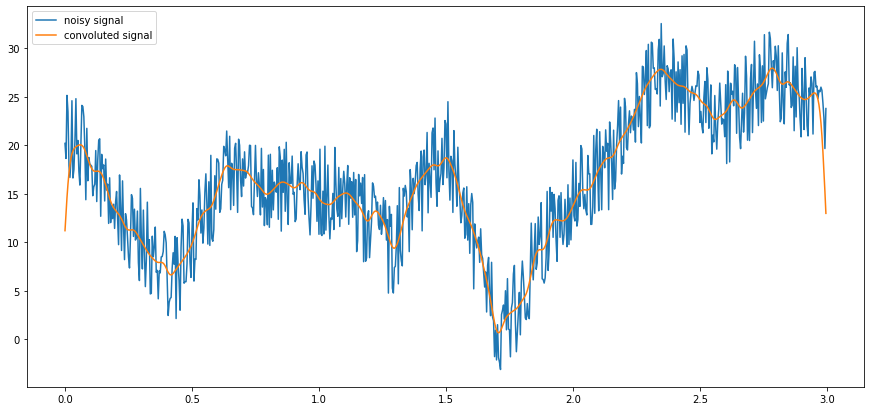

In [36]:
# Performing convolution

n_convolution = n_data + (2 * k + 1) - 1
noisy_signal_fft = np.fft.fft(noisy_signal, n_convolution)
gaussian_window_fft = np.fft.fft(gaussian_window, n_convolution)
convolved_signal = np.fft.ifft(noisy_signal_fft * gaussian_window_fft)
convolved_signal = convolved_signal[k:-k]  # cutting off convolution leftovers

plt.figure(figsize=(15, 7))
plt.plot(time, noisy_signal, label='noisy signal')
plt.plot(time, convolved_signal, label='convoluted signal')
plt.legend()